### Import Libraries

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score
)
import pprint
from matplotlib import pyplot as plt
from sklearn.utils import resample
from model_scoring import scoring

### Import Scaler

In [15]:
def load(filename = "scaler.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 

    except FileNotFoundError: 
        print("File not found!")

scaler = load("scaler.pickle")

In [16]:
data = pd.read_csv('cleaned_data.csv')

X = data.drop(['Bankrupt?'], axis=1)
y = data['Bankrupt?']

### Oversampling

In [24]:
# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.25, random_state=42)

In [17]:
X_train_scaled = scaler.fit(X)
X_train_norm = pd.DataFrame(X_train_scaled.transform(X), columns=X.columns)

train = pd.concat([X_train_norm, y], axis=1)

In [19]:
#  Oversampling

yes_bankrupt = train[train['Bankrupt?']==1]
no_bankrupt = train[train['Bankrupt?']==0]

yes_bankrupt_oversampled = resample(
    yes_bankrupt,
    replace=True,
    n_samples=len(no_bankrupt),
    random_state=0,
)

train_oversampled = pd.concat([no_bankrupt,yes_bankrupt_oversampled],axis=0).dropna()

In [21]:
y_train_over = train_oversampled['Bankrupt?'].copy()
X_train_over = train_oversampled.drop(['Bankrupt?'], axis=1).copy()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_train_over, y_train_over, test_size=.25, random_state=42)

### Train & Test Model

In [23]:
clf = GaussianNB()

clf.fit(X_train, y_train)

GaussianNB()

In [24]:
y_pred = clf.predict(X_test)

## SCORING

In [25]:
from model_scoring import scoring

'The accuracy score of the model is: 0.7948484848484848 '
'The precision score of the model is: 0.7379172894867962 '
'The recall score of the model is: 0.9074754901960784 '
'The ROC AUC score of the model is: 0.7960638841867682 '


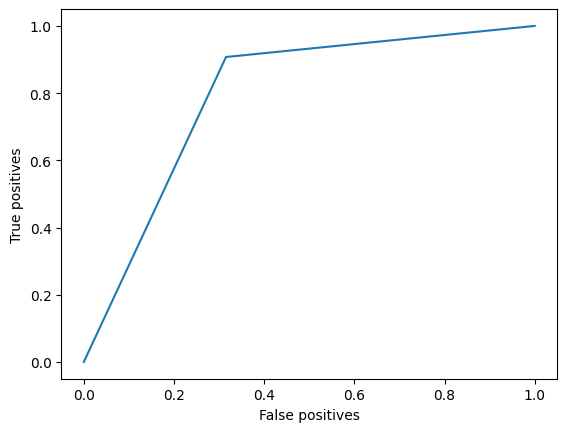

In [26]:
scoring(y_test, y_pred)

In [41]:
DTC_Y_pred = DTC_model.fit(X_train, Y_train)
ETC_Y_pred= ETC_model.fit(X_train, Y_train)

# Make predictions on train and test sets
DTC_train_prediction = DTC_model.predict(X_train)
DTC_test_prediction = DTC_model.predict(X_test)

ETC_train_prediction = ETC_model.predict(X_train)
ETC_test_prediction = ETC_model.predict(X_test)

# Evaluation metrics for DecisionTreeClassifier
DTC_train_accuracy = accuracy_score(Y_train, DTC_train_prediction)
DTC_train_precision = precision_score(Y_train, DTC_train_prediction)
DTC_train_recall = recall_score(Y_train, DTC_train_prediction)

DTC_test_accuracy = accuracy_score(Y_test, DTC_test_prediction)
DTC_test_precision = precision_score(Y_test, DTC_test_prediction)
DTC_test_recall = recall_score(Y_test, DTC_test_prediction)


# Evaluation metrics for ExtraTreesClassifier
ETC_train_accuracy = accuracy_score(Y_train, ETC_train_prediction)
ETC_train_precision = precision_score(Y_train, ETC_train_prediction)
ETC_train_recall = recall_score(Y_train, ETC_train_prediction)

ETC_test_accuracy = accuracy_score(Y_test, ETC_test_prediction)
ETC_test_precision = precision_score(Y_test, ETC_test_prediction)
ETC_test_recall = recall_score(Y_test, ETC_test_prediction)

NameError: name 'DTC_model' is not defined

In [ ]:
print("Decision Tree Classifier AKA DTC:")
print("***")
print("Train Accuracy:", DTC_train_accuracy)
print("Train Precision:", DTC_train_precision)
print("Train Recall:", DTC_train_recall)
print("***")
print("Test Accuracy:", DTC_test_accuracy)
print("Test Precision:", DTC_test_precision)
print("Test Recall:", DTC_test_recall)
print()
print()

print("Logistic Extra Trees Classifier AKA ETC:")
print("***")
print("Train Accuracy:", ETC_train_accuracy)
print("Train Precision:", ETC_train_precision)
print("Train Recall:", ETC_train_recall)
print("***")
print("Test Accuracy:", ETC_test_accuracy)
print("Test Precision:", ETC_test_precision)
print("Test Recall:", ETC_test_recall)